# Teen Social Media Sentiment Analysis 

In [2]:
# 📱 Teenagers, Sigma Grindset & Social Media Sentiment Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import random

# Gen Z + Sigma slang phrases
all_phrases = ['Lowkey stressed but still vibing.', 'She ate and left no crumbs 💅', 'I’m literally crying over this TikTok 😭', 'Why is school so mentally draining 😩', 'Main character energy today ✨', 'Can we normalize not being okay?', 'Deadass can’t deal with people rn 😤', 'This fit is giving everything it needs to give 💯', 'That test did me so dirty 💀', 'Mentally I’m at the beach 🌊', 'This day has been straight chaos.', 'I just wanna nap for like… forever 😴', 'He’s not him fr. Red flags everywhere 🚩', 'I’m too emotionally unstable for this 😭', 'The way I dissociate in class is insane 💭', 'This song hits harder at 2am 🎧', "I'm not built for this much interaction 💀", 'Caught feelings, send help 😳', 'IDK how to explain it, but this week feels off.', 'My social battery is at 1% 🔋', 'I was productive for like 5 minutes… proud of me 😎', 'Currently questioning all my life choices 🤡', 'This is not the vibe I signed up for.', 'Who gave Tuesday the right to be this long?', 'Overthinking everything like it’s a full-time job 🧠', 'Do I need therapy or a nap? Yes.', 'This generation’s humor is actually unhinged 😂', "I saw one red flag and said 'cute' 💀", 'That moment when you realize it’s only Wednesday 😩', 'I miss when the biggest drama was trading gel pens 😭', 'On my sigma grindset 🧠💼', 'Reez levels off the charts today 😤🔥', 'No thoughts, just reez.', 'Built different. Can’t explain it, just am.', 'Silent but deadly. Sigma mindset activated.', 'Chasing goals, not people 💪', "I don't chase, I attract. That’s sigma science.", 'Woke up and chose excellence 😤', 'This ain’t a phase, it’s the grind.', 'NPCs everywhere, stay focused king 👑', 'In my own lane. And it’s a highway 🚗💨', 'Energy too rare to be understood.', 'She saw the reez and folded instantly.', 'Grinding in silence, flexing in results.', 'Emotionally unavailable, professionally unstoppable.', 'Wasn’t born to fit in, I was built to lead.', 'Wake. Work. Win. Repeat.', 'Success isn’t a vibe, it’s a lifestyle.', 'Beta behavior? Couldn’t be me.', 'Can’t spell reez without me in it 💯']
posts = random.choices(all_phrases, k=100)

# Sentiment analysis
df = pd.DataFrame(posts, columns=["Post"])
df["Polarity"] = df["Post"].apply(lambda x: TextBlob(x).sentiment.polarity)
df["Sentiment"] = pd.cut(df["Polarity"], bins=[-1, -0.1, 0.1, 1], labels=["Negative", "Neutral", "Positive"])


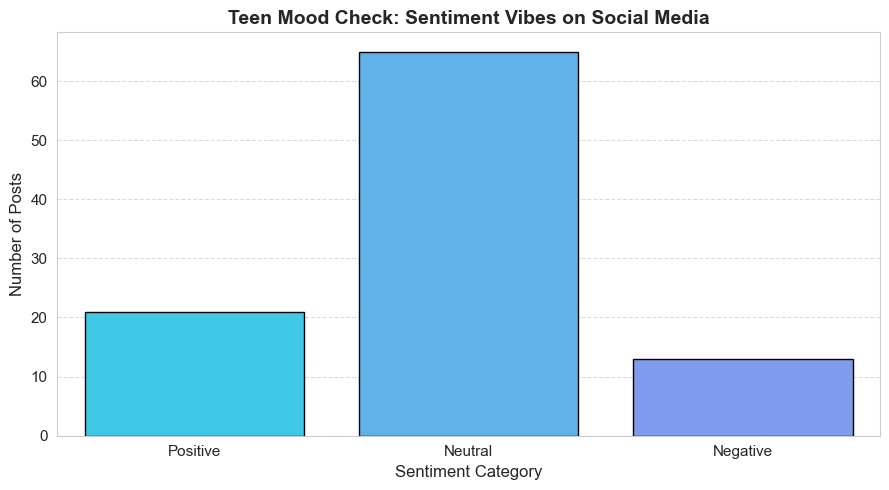

In [7]:
# Sentiment Distribution
plt.figure(figsize=(9, 5))
sns.set_style("whitegrid")
sns.set_palette("cool")

sns.countplot(
    data=df,
    x="Sentiment",
    order=["Positive", "Neutral", "Negative"],
    edgecolor='black'
)

plt.title("Teen Mood Check: Sentiment Vibes on Social Media", fontsize=14, fontweight='bold')
plt.xlabel("Sentiment Category", fontsize=12)
plt.ylabel("Number of Posts", fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

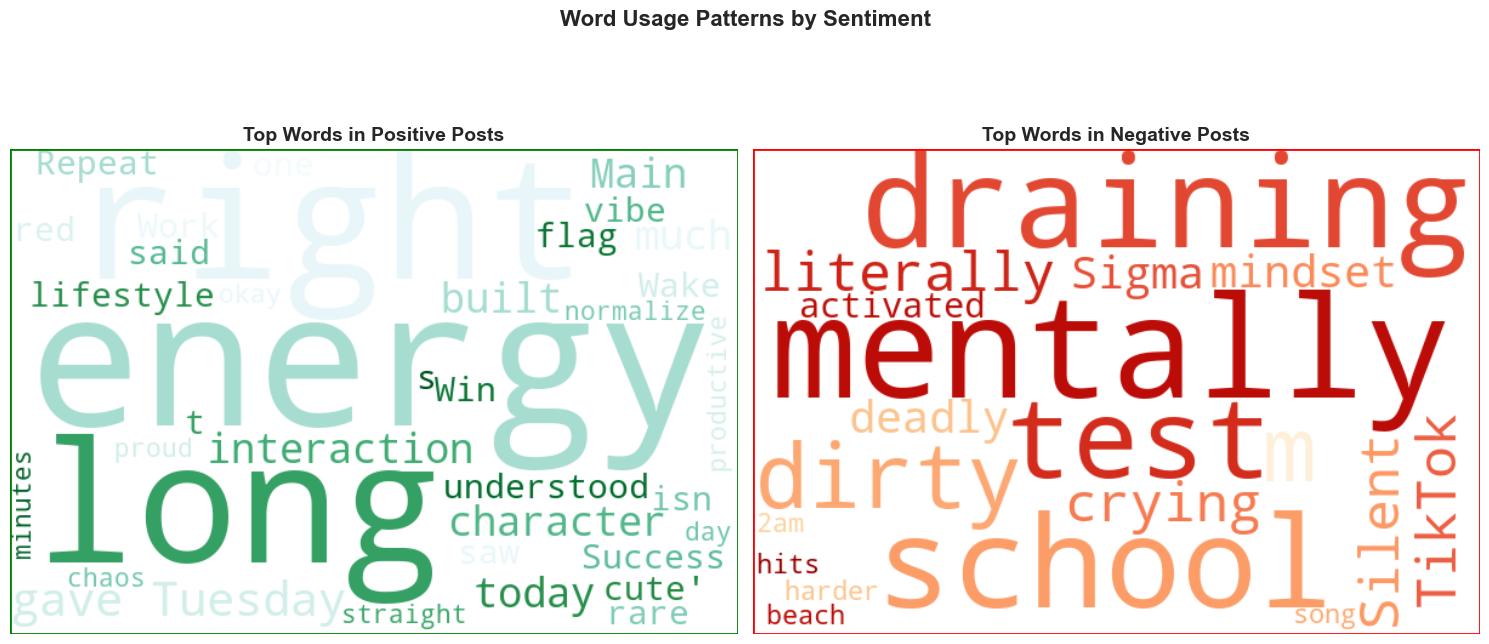

In [8]:
from matplotlib.patches import Rectangle

# Combine positive and negative posts
positive_text = " ".join(df[df["Sentiment"] == "Positive"]["Post"])
negative_text = " ".join(df[df["Sentiment"] == "Negative"]["Post"])

# Generate word clouds with high resolution and mask options
wc_pos = WordCloud(
    background_color='white',
    colormap='BuGn',
    max_words=100,
    contour_color='black',
    contour_width=1.5,
    width=600,
    height=400
).generate(positive_text)

wc_neg = WordCloud(
    background_color='white',
    colormap='OrRd',
    max_words=100,
    contour_color='black',
    contour_width=1.5,
    width=600,
    height=400
).generate(negative_text)

# Plot side-by-side with framed titles
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
axs[0].imshow(wc_pos, interpolation='bilinear')
axs[0].set_title("Top Words in Positive Posts", fontsize=14, fontweight='bold', loc='center')
axs[0].add_patch(Rectangle((0, 0), 1, 1, fill=False, color='green', lw=2, transform=axs[0].transAxes))
axs[0].axis('off')

axs[1].imshow(wc_neg, interpolation='bilinear')
axs[1].set_title("Top Words in Negative Posts", fontsize=14, fontweight='bold', loc='center')
axs[1].add_patch(Rectangle((0, 0), 1, 1, fill=False, color='red', lw=2, transform=axs[1].transAxes))
axs[1].axis('off')

plt.suptitle("Word Usage Patterns by Sentiment", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()
